# Needed Modules

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Import Fine - Tuned GeoBERT

In [40]:
from transformers import TFAutoModelForTokenClassification
from transformers import AutoTokenizer
model_checkpoint = "botryan96/GeoBERT"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
models = TFAutoModelForTokenClassification.from_pretrained(model_checkpoint)

Some layers from the model checkpoint at botryan96/GeoBERT were not used when initializing TFBertForTokenClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at botryan96/GeoBERT.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


# Data Preparation

In [41]:
sentence = ['In North America, the water storage in the seepage face model is higher than the base case because positive pore pressure is requisite for drainage through a seepage face boundary condition. The result from the resistivity data supports the notion, especially in the northern part of the Sandstone Sediment formation. The active formation of America has a big potential for Oil and Gas based on the seismic section, has been activated since the Paleozoic.']

In [42]:
outputs = tokenizer(sentence, return_tensors="np", padding="longest")
out = models(outputs, output_hidden_states= True)

In [59]:
loc = outputs.word_ids()
tokens = outputs.tokens()
ids = tokenizer.convert_tokens_to_ids(tokens)

print(list(zip(tokens, ids, loc)))
print(' ')
print(list(zip(tokens, ids, loc))[28])
print(list(zip(tokens, ids, loc))[55])

[('[CLS]', 2, None), ('in', 126, 0), ('north', 764, 1), ('america', 15952, 2), (',', 9, 3), ('the', 116, 4), ('water', 1162, 5), ('storage', 14152, 6), ('in', 126, 7), ('the', 116, 8), ('see', 4130, 9), ('##pa', 13842, 9), ('##ge', 678, 9), ('face', 5840, 10), ('model', 585, 11), ('is', 162, 12), ('higher', 830, 13), ('than', 528, 14), ('the', 116, 15), ('base', 1131, 16), ('case', 2434, 17), ('because', 1284, 18), ('positive', 1796, 19), ('pore', 4869, 20), ('pressure', 1115, 21), ('is', 162, 22), ('requisite', 21578, 23), ('for', 166, 24), ('drainage', 19005, 25), ('through', 966, 26), ('a', 24, 27), ('see', 4130, 28), ('##pa', 13842, 28), ('##ge', 678, 28), ('face', 5840, 29), ('boundary', 2215, 30), ('condition', 946, 31), ('.', 11, 32), ('the', 116, 33), ('result', 1533, 34), ('from', 183, 35), ('the', 116, 36), ('resistivity', 22383, 37), ('data', 500, 38), ('supports', 5243, 39), ('the', 116, 40), ('notion', 14539, 41), (',', 9, 42), ('especially', 3294, 43), ('in', 126, 44), ('

In [57]:
america_1 = out.hidden_states[-1][0][3]
america_2 = out.hidden_states[-1][0][63]

# Application of PCA

In [48]:
#PCA (Principal Component Analysis)
pca = PCA(n_components=1)
pca.fit(america_1.numpy().reshape(1,768)*10)
x_pca = pca.transform(america_1.numpy().reshape(1,768))
print('Dimension After PCA:',x_pca.shape, " = ", x_pca)

Dimension After PCA: (1, 1)  =  [[2.0388553]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:499: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


In [49]:
#PCA (Principal Component Analysis)
pca = PCA(n_components=1)
pca.fit(america_2.numpy().reshape(1,768)*10)
x_pca_2 = pca.transform(america_1.numpy().reshape(1,768))
print('Dimension After PCA:',x_pca_2.shape, " = ", x_pca_2)

Dimension After PCA: (1, 1)  =  [[-0.19713129]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:499: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


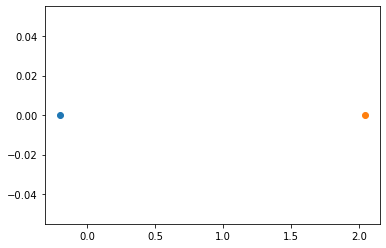

In [30]:
plt.scatter(x_pca_2[0], 0)
plt.scatter(x_pca[0], 0)

In [50]:
america_1 = out.hidden_states[-1][0][37]
america_2 = out.hidden_states[-1][0][70]

In [51]:
#PCA (Principal Component Analysis)
pca = PCA(n_components=1)
pca.fit(america_1.numpy().reshape(1,768)*10)
x_pca = pca.transform(america_1.numpy().reshape(1,768))
print('Dimension After PCA:',x_pca.shape, " = ", x_pca)

Dimension After PCA: (1, 1)  =  [[2.5296776]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:499: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


In [52]:
#PCA (Principal Component Analysis)
pca = PCA(n_components=1)
pca.fit(america_2.numpy().reshape(1,768)*10)
x_pca_2 = pca.transform(america_1.numpy().reshape(1,768))
print('Dimension After PCA:',x_pca_2.shape, " = ", x_pca_2)

Dimension After PCA: (1, 1)  =  [[0.7167303]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:499: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


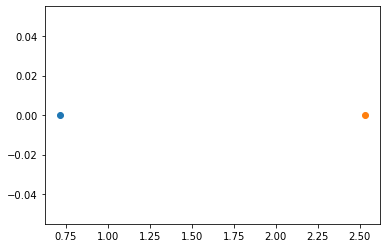

In [53]:
plt.scatter(x_pca_2[0], 0)
plt.scatter(x_pca[0], 0)

In [60]:
america_1 = out.hidden_states[-1][0][28]
america_2 = out.hidden_states[-1][0][55]

In [61]:
#PCA (Principal Component Analysis)
pca = PCA(n_components=1)
pca.fit(america_1.numpy().reshape(1,768)*10)
x_pca = pca.transform(america_1.numpy().reshape(1,768))
print('Dimension After PCA:',x_pca.shape, " = ", x_pca)

Dimension After PCA: (1, 1)  =  [[6.0463424]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:499: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


In [62]:
#PCA (Principal Component Analysis)
pca = PCA(n_components=1)
pca.fit(america_2.numpy().reshape(1,768)*10)
x_pca_2 = pca.transform(america_1.numpy().reshape(1,768))
print('Dimension After PCA:',x_pca_2.shape, " = ", x_pca_2)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Dimension After PCA: (1, 1)  =  [[0.7888971]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:499: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)
